In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [8]:
df_sample1 = pd.read_csv("Breast_Cancer_Augmented_Positive_Dataset_8k.csv")
df_sample1

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
0,0.512804,0.058938,0.529435,0.070050,0.265008,0.027912,0.885629,0.316553,0.150481,0.259909,...,0.967715,0.038204,0.036946,0.037648,0.037300,0.038204,0.036946,0.037648,0.037300,1.0
1,0.543392,0.072460,0.357297,1.824225,0.011772,0.305774,0.442124,0.238234,0.404805,0.222462,...,0.973693,0.038753,0.040148,0.040421,0.038398,0.038753,0.040148,0.040421,0.038398,1.0
2,0.462972,0.023815,0.995784,0.411113,0.291706,0.221538,0.647339,0.891442,0.081914,0.127952,...,0.964691,0.043936,0.040705,0.041327,0.043020,0.043936,0.040705,0.041327,0.043020,1.0
3,0.614602,0.134259,0.112894,0.660946,0.099556,0.710268,0.784855,0.113133,0.261060,0.327604,...,0.982214,0.032544,0.031366,0.032945,0.032998,0.032544,0.031366,0.032945,0.032998,1.0
4,0.749940,0.061687,0.795646,0.744609,0.168979,0.680204,0.395964,0.259196,0.411569,0.161880,...,0.997227,0.021783,0.021543,0.021990,0.021696,0.021783,0.021543,0.021990,0.021696,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7815,0.649234,0.032202,0.160830,1.542416,0.286979,0.173201,0.634189,0.147836,0.376638,0.165056,...,0.995145,0.028403,0.027558,0.027746,0.027644,0.028403,0.027558,0.027746,0.027644,1.0
7816,0.198588,0.189913,0.593163,2.020908,0.071868,0.717029,0.311775,0.261614,0.335414,0.229683,...,0.977090,0.039669,0.040739,0.041195,0.039638,0.039669,0.040739,0.041195,0.039638,1.0
7817,0.335369,0.144272,0.238421,1.303674,0.579740,0.189792,0.779709,0.755286,0.638449,0.240480,...,0.960393,0.054801,0.057350,0.058956,0.054631,0.054801,0.057350,0.058956,0.054631,1.0
7818,0.504851,0.039228,0.283918,0.772767,0.015357,0.284417,0.383878,0.030593,0.200283,0.213998,...,0.957405,0.068200,0.068377,0.067482,0.065991,0.068200,0.068377,0.067482,0.065991,1.0


In [9]:
df_sample2 = pd.read_csv("Breast_Cancer_10k_2_Dataset.csv")
df_sample2

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
0,0.185713,0.129328,0.151128,1.148885,0.355841,0.092020,0.641751,0.588707,0.371998,0.493291,...,0.956743,0.050902,0.053116,0.054807,0.050988,0.050902,0.053116,0.054807,0.050988,0.0
1,0.360726,0.373147,0.526488,0.537230,0.136993,0.089766,0.505770,0.140908,0.120453,0.137948,...,0.995146,0.025075,0.023461,0.021841,0.023263,0.025075,0.023461,0.021841,0.023263,0.0
2,0.157023,0.167137,0.237207,1.282194,0.121771,0.533974,0.293243,0.182768,0.672679,0.248403,...,0.973035,0.033974,0.034887,0.035874,0.034150,0.033974,0.034887,0.035874,0.034150,0.0
3,0.166641,0.767016,0.655124,1.818139,0.512169,0.010876,0.748262,0.146314,0.671473,0.196390,...,0.985751,0.030838,0.029879,0.031978,0.031594,0.030838,0.029879,0.031978,0.031594,0.0
4,0.111832,0.024164,0.259883,1.798461,0.196784,0.589911,0.254228,0.505094,0.795052,0.341958,...,0.995997,0.015538,0.015425,0.015983,0.015564,0.015538,0.015425,0.015983,0.015564,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.215518,0.023180,0.034412,1.870273,1.148400,0.741835,0.962309,0.432459,0.227685,0.058556,...,0.976251,0.040627,0.041627,0.041772,0.039499,0.040627,0.041627,0.041772,0.039499,0.0
9996,0.744583,0.083952,0.237501,1.808680,0.223173,0.336731,0.729377,0.256534,0.373716,0.150315,...,0.966343,0.039391,0.037296,0.036356,0.037387,0.039391,0.037296,0.036356,0.037387,0.0
9997,1.200996,0.011994,0.161329,0.846234,0.154310,0.213440,0.589500,0.088370,0.261969,0.466251,...,0.959386,0.047217,0.047710,0.051098,0.049133,0.047217,0.047710,0.051098,0.049133,0.0
9998,0.402526,1.326257,0.970394,1.177871,0.442189,0.288784,0.841492,0.825971,0.238176,0.207474,...,0.984141,0.025219,0.024221,0.024976,0.025639,0.025219,0.024221,0.024976,0.025639,0.0


In [10]:

df = pd.concat([df_sample1,df_sample2])
df

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
0,0.512804,0.058938,0.529435,0.070050,0.265008,0.027912,0.885629,0.316553,0.150481,0.259909,...,0.967715,0.038204,0.036946,0.037648,0.037300,0.038204,0.036946,0.037648,0.037300,1.0
1,0.543392,0.072460,0.357297,1.824225,0.011772,0.305774,0.442124,0.238234,0.404805,0.222462,...,0.973693,0.038753,0.040148,0.040421,0.038398,0.038753,0.040148,0.040421,0.038398,1.0
2,0.462972,0.023815,0.995784,0.411113,0.291706,0.221538,0.647339,0.891442,0.081914,0.127952,...,0.964691,0.043936,0.040705,0.041327,0.043020,0.043936,0.040705,0.041327,0.043020,1.0
3,0.614602,0.134259,0.112894,0.660946,0.099556,0.710268,0.784855,0.113133,0.261060,0.327604,...,0.982214,0.032544,0.031366,0.032945,0.032998,0.032544,0.031366,0.032945,0.032998,1.0
4,0.749940,0.061687,0.795646,0.744609,0.168979,0.680204,0.395964,0.259196,0.411569,0.161880,...,0.997227,0.021783,0.021543,0.021990,0.021696,0.021783,0.021543,0.021990,0.021696,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.215518,0.023180,0.034412,1.870273,1.148400,0.741835,0.962309,0.432459,0.227685,0.058556,...,0.976251,0.040627,0.041627,0.041772,0.039499,0.040627,0.041627,0.041772,0.039499,0.0
9996,0.744583,0.083952,0.237501,1.808680,0.223173,0.336731,0.729377,0.256534,0.373716,0.150315,...,0.966343,0.039391,0.037296,0.036356,0.037387,0.039391,0.037296,0.036356,0.037387,0.0
9997,1.200996,0.011994,0.161329,0.846234,0.154310,0.213440,0.589500,0.088370,0.261969,0.466251,...,0.959386,0.047217,0.047710,0.051098,0.049133,0.047217,0.047710,0.051098,0.049133,0.0
9998,0.402526,1.326257,0.970394,1.177871,0.442189,0.288784,0.841492,0.825971,0.238176,0.207474,...,0.984141,0.025219,0.024221,0.024976,0.025639,0.025219,0.024221,0.024976,0.025639,0.0


In [11]:
df = df.drop(['2048', '2049', '2050','2051','2052','2053'], axis=1)
df = df.dropna()
df = df[df['2102'] != 2102.0]

In [12]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [13]:
X=df.drop("2102",axis=1)
Y=df["2102"]

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
sss.get_n_splits(X, Y)

5

In [16]:
a=sss.split(X,Y)

In [17]:
X=df.drop("2102",axis=1)
Y=df["2102"]
seed = 1
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=1)

In [18]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

In [19]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_preds_rf = random_forest.predict(X_test)

In [21]:
y_preds_rf

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0.

In [22]:
random_forest.score(X_train, y_train)


1.0

In [23]:
random_forest.score(X_test, y_test)


0.8698092031425365

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score, precision_score


In [110]:
acc_rf = accuracy_score(y_test,y_preds_rf)
print('Accuracy of the model: {0}%'.format(acc_rf))

Accuracy of the model: 0.8698092031425365%


In [111]:
f1_rf = f1_score(y_test,y_preds_rf)
print('F1 score of the model: {0}%'.format(f1_rf))

F1 score of the model: 0.8379888268156426%


In [112]:
rec_rf = recall_score(y_test,y_preds_rf)
print('Recall of the model: {0}%'.format(f1_rf))

Recall of the model: 0.8379888268156426%


In [113]:
pre_rf = precision_score(y_test,y_preds_rf)
print('Precision of the model: {0}%'.format(f1_rf))

Precision of the model: 0.8379888268156426%


In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [30]:
log_reg.fit(X_train, y_train)


/home/toghrul/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
log_reg.score(X_test, y_test)


0.819304152637486

In [32]:
log_reg.score(X_train, y_train)


0.8822250280583613

In [33]:
y_preds_log_reg = log_reg.predict(X_test)


In [34]:
y_preds_log_reg


array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0.

In [114]:
acc_log_reg = accuracy_score(y_test,y_preds_log_reg)
print('Accuracy of the model: {0}%'.format(acc_log_reg))

Accuracy of the model: 0.819304152637486%


In [115]:
f1_log_reg = f1_score(y_test,y_preds_log_reg)
print('F1 score of the model: {0}%'.format(f1_log_reg))

F1 score of the model: 0.7873183619550859%


In [116]:
rec_log_reg = recall_score(y_test,y_preds_log_reg)
print('Recall of the model: {0}%'.format(rec_log_reg))

Recall of the model: 0.7376237623762376%


In [117]:
pre_log_reg = precision_score(y_test,y_preds_log_reg)
print('Precision of the model: {0}%'.format(pre_log_reg))

Precision of the model: 0.8441926345609065%


In [39]:
from sklearn.neighbors import KNeighborsClassifier


In [40]:
KNN = KNeighborsClassifier()


In [41]:
KNN.fit(X_train, y_train)


KNeighborsClassifier()

In [42]:
y_preds_knn = KNN.predict(X_test)


In [43]:
y_preds_knn


array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0.

In [44]:
KNN.score(X_train, y_train)


0.8920454545454546

In [45]:
KNN.score(X_test, y_test)


0.8282828282828283

In [118]:
acc_KNN = accuracy_score(y_test,y_preds_knn)
print('Accuracy of the model: {0}%'.format(acc_KNN))

Accuracy of the model: 0.8282828282828283%


In [119]:
f1_KNN = f1_score(y_test,y_preds_knn)
print('F1 score of the model: {0}%'.format(f1_KNN))

F1 score of the model: 0.799475753604194%


In [120]:
rec_KNN = recall_score(y_test,y_preds_knn)
print('Recall of the model: {0}%'.format(rec_KNN))

Recall of the model: 0.754950495049505%


In [121]:
pre_KNN = precision_score(y_test,y_preds_knn)
print('Precision of the model: {0}%'.format(pre_KNN))

Precision of the model: 0.8495821727019499%


In [50]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [51]:
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [52]:
y_preds_ds = decision_tree.predict(X_test)


In [53]:
y_preds_ds


array([0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0.

In [54]:
decision_tree.score(X_train, y_train)


1.0

In [55]:
decision_tree.score(X_test, y_test)


0.7530864197530864

In [122]:
acc_decision_tree = accuracy_score(y_test,y_preds_ds)
print('Accuracy of the model: {0}%'.format(acc_decision_tree))

Accuracy of the model: 0.7530864197530864%


In [123]:
f1_decision_tree = f1_score(y_test,y_preds_ds)
print('F1 score of the model: {0}%'.format(f1_decision_tree))

F1 score of the model: 0.7349397590361446%


In [124]:
rec_decision_tree = recall_score(y_test,y_preds_ds)
print('Recall of the model: {0}%'.format(rec_decision_tree))

Recall of the model: 0.754950495049505%


In [125]:
pre_decision_tree = precision_score(y_test,y_preds_ds)
print('Precision of the model: {0}%'.format(pre_decision_tree))

Precision of the model: 0.715962441314554%


In [62]:
from sklearn.svm import SVC, LinearSVC


In [63]:
svc = SVC()
linear_svm = LinearSVC()

In [64]:
svc.fit(X_train, y_train)


SVC()

In [65]:
linear_svm.fit(X_train, y_train)


/home/toghrul/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [66]:
svc.score(X_train, y_train)


0.8850308641975309

In [67]:
y_preds_svc = svc.predict(X_test)


In [68]:
y_preds_svc


array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [126]:
acc_svc = accuracy_score(y_test,y_preds_svc)
print('Accuracy of the model: {0}%'.format(acc_svc))

Accuracy of the model: 0.8540965207631874%


In [127]:
f1_svc = f1_score(y_test,y_preds_svc)
print('F1 score of the model: {0}%'.format(f1_svc))

F1 score of the model: 0.8121387283236994%


In [128]:
rec_svc = recall_score(y_test,y_preds_svc)
print('Recall score of the model: {0}%'.format(rec_svc))

Recall score of the model: 0.6955445544554455%


In [129]:
pre_svc = precision_score(y_test,y_preds_svc)
print('Precision of the model: {0}%'.format(pre_svc))

Precision of the model: 0.9756944444444444%


In [73]:
linear_svm.score(X_train, y_train)


0.8929573512906847

In [74]:
y_preds_linear_svc = linear_svm.predict(X_test)


In [75]:
y_preds_linear_svc


array([1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0.

In [130]:
acc_linear_svc = accuracy_score(y_test,y_preds_linear_svc)
print('Accuracy of the model: {0}%'.format(acc_linear_svc))

Accuracy of the model: 0.8271604938271605%


In [131]:
f1_linear_svc = f1_score(y_test,y_preds_linear_svc)
print('F1 score of the model: {0}%'.format(f1_linear_svc))

F1 score of the model: 0.7989556135770235%


In [132]:
rec_linear_svc = recall_score(y_test,y_preds_linear_svc)
print('Recall of the model: {0}%'.format(rec_linear_svc))

Recall of the model: 0.7574257425742574%


In [133]:
pre_linear_svc = precision_score(y_test,y_preds_linear_svc)
print('Precision of the model: {0}%'.format(pre_linear_svc))

Precision of the model: 0.8453038674033149%


In [84]:
Models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Logistic Regression', 'KNeighbour Clasifier',
              'Decision Tree', 'SVC', 'Linear SVC'],
    'Accuracy' : [acc_rf, acc_log_reg, acc_KNN, acc_decision_tree, acc_svc, acc_linear_svc],
    'Recall' : [rec_rf, rec_log_reg, rec_KNN, rec_decision_tree, rec_svc, rec_linear_svc],
    'Precision' : [pre_rf, pre_log_reg, pre_KNN, pre_decision_tree, pre_svc, pre_linear_svc],
    'F1 score' : [f1_rf, f1_log_reg, f1_KNN, f1_decision_tree, f1_svc, f1_linear_svc]
})
Models.sort_values(by = "F1 score", ascending = False)

,Model,Accuracy,Recall,Precision,F1 score
0,Random Forest Classifier,86.980920,74.257426,96.153846,83.798883
4,SVC,85.409652,69.554455,97.569444,81.213873
2,KNeighbour Clasifier,82.828283,75.495050,84.958217,79.947575
5,Linear SVC,82.716049,75.742574,84.530387,79.895561
1,Logistic Regression,81.930415,73.762376,84.419263,78.731836
3,Decision Tree,75.308642,75.495050,71.596244,73.493976


<AxesSubplot:>

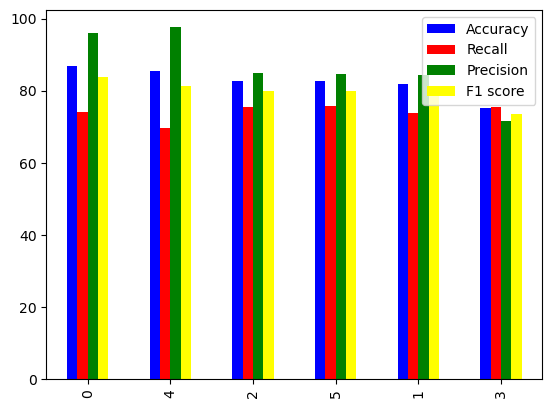

In [88]:
Models.sort_values(by = "F1 score", ascending = False).plot(kind = "bar", color = ["blue", 'red','green','yellow'])

In [90]:
df['0'] = df['0'].astype(float)

In [91]:
import xgboost as xgb

In [92]:
class_weight=int(y_train.value_counts()[0]/y_train.value_counts()[1])

In [93]:
XGBoost=xgb.XGBClassifier(scale_pos_weight=class_weight)

In [94]:
xgboost_param_grid={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth'    :[1,2,3,4,5,6,7,8,9,10],
    'min_child_weight':[1,3,5,7],
    'colsample_bytree':[0.3,0.4,0.5,0.6,0.7],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5]
}

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve,KFold

In [97]:
kfold=StratifiedKFold(n_splits=5,shuffle=True)

In [98]:
gsXGoost=RandomizedSearchCV(estimator=XGBoost,param_distributions=xgboost_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1)

In [99]:
gsXGoost.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           import...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                     

In [100]:
XGBOOST_best = gsXGoost.best_estimator_

# Best score
gsXGoost.best_score_

0.9189727018975496

In [101]:
prediction = XGBOOST_best.predict(X_test)
y_pred = prediction

In [102]:
metrics.accuracy_score(y_test, y_pred)

0.8821548821548821

In [103]:
metrics.f1_score(y_test, y_pred)

0.859437751004016

In [134]:
acc_xgboost = accuracy_score(y_test,y_pred)
print('Accuracy of the model: {0}%'.format(acc_xgboost))

Accuracy of the model: 0.8821548821548821%


In [135]:
pre_xgboost = precision_score(y_test,y_pred)
print('Precision of the model: {0}%'.format(pre_xgboost))

Precision of the model: 0.9358600583090378%


In [136]:
rec_xgboost = recall_score(y_test,y_pred)
print('Recall of the model: {0}%'.format(rec_xgboost))

Recall of the model: 0.7945544554455446%


In [137]:
f1_xgboost = f1_score(y_test,y_pred)
print('F1 score of the model: {0}%'.format(f1_xgboost))

F1 score of the model: 0.859437751004016%


In [138]:
Models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Logistic Regression', 'KNeighbour Clasifier',
              'Decision Tree', 'SVC', 'XGBoost'],
    'Accuracy' : [acc_rf, acc_log_reg, acc_KNN, acc_decision_tree, acc_svc,acc_xgboost],
    'Recall' : [rec_rf, rec_log_reg, rec_KNN, rec_decision_tree, rec_svc,rec_xgboost],
    'Precision' : [pre_rf, pre_log_reg, pre_KNN, pre_decision_tree, pre_svc,pre_xgboost],
    'F1 score' : [f1_rf, f1_log_reg, f1_KNN, f1_decision_tree, f1_svc, f1_xgboost]
})
Models.sort_values(by = "F1 score", ascending = False)

,Model,Accuracy,Recall,Precision,F1 score
5,XGBoost,0.882155,0.794554,0.935860,0.859438
0,Random Forest Classifier,0.869809,0.742574,0.961538,0.837989
4,SVC,0.854097,0.695545,0.975694,0.812139
2,KNeighbour Clasifier,0.828283,0.754950,0.849582,0.799476
1,Logistic Regression,0.819304,0.737624,0.844193,0.787318
3,Decision Tree,0.753086,0.754950,0.715962,0.734940


<AxesSubplot:>

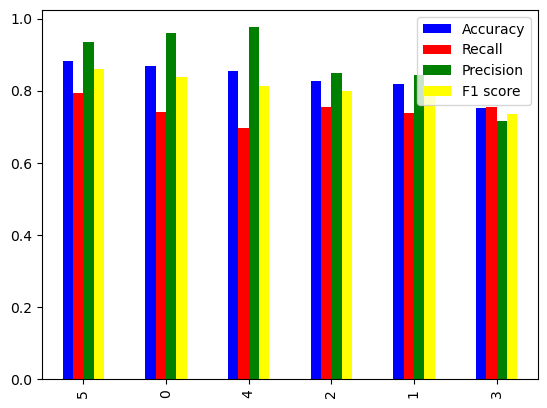

In [139]:
Models.sort_values(by = "F1 score", ascending = False).plot(kind = "bar", color = ["blue", 'red','green','yellow'])

In [79]:
# predict the results
y_pred=clf.predict(X_test)

In [80]:


# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))



LightGBM Model accuracy score: 0.8687


In [81]:


# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])



Confusion matrix

 [[463  24]
 [ 93 311]]

True Positives(TP) =  463

True Negatives(TN) =  311

False Positives(FP) =  24

False Negatives(FN) =  93


In [82]:


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       487
         1.0       0.93      0.77      0.84       404

    accuracy                           0.87       891
   macro avg       0.88      0.86      0.86       891
weighted avg       0.88      0.87      0.87       891



In [83]:
metrics.f1_score(y_test, y_pred)

0.8416779431664412

In [84]:
metrics.accuracy_score(y_test, y_pred)

0.8686868686868687